<a href="https://colab.research.google.com/github/Abdul-Rahman258/ML_Practice/blob/main/Linear_Regression_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
take this data set analyze it perform data preprocessing on it then move it through EDA and then train the model using linear regression and dont forget to add key points after each block of code for better understanding and why you performed a specific task

Here is all the data you need:
"Salary_dataset.csv"

## Data loading

### Subtask:
Load the "Salary_dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the dataset, display its basic information, and check its structure.



In [11]:
import pandas as pd

try:
    df = pd.read_csv('Salary_dataset.csv')
    display(df.head())
    print(f"Shape of the DataFrame: {df.shape}")
    print(f"Columns in the DataFrame: {df.columns}")
    print(f"Data types of each column:\n{df.dtypes}")
    df.info()
except FileNotFoundError:
    print("Error: 'Salary_dataset.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Shape of the DataFrame: (30, 3)
Columns in the DataFrame: Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')
Data types of each column:
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining data types, checking for missing values, calculating descriptive statistics, creating visualizations, and calculating correlations.



Data Types:
 Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

Missing Values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Percentage of Missing Values:
 Unnamed: 0         0.0
YearsExperience    0.0
Salary             0.0
dtype: float64

Descriptive Statistics:
        Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


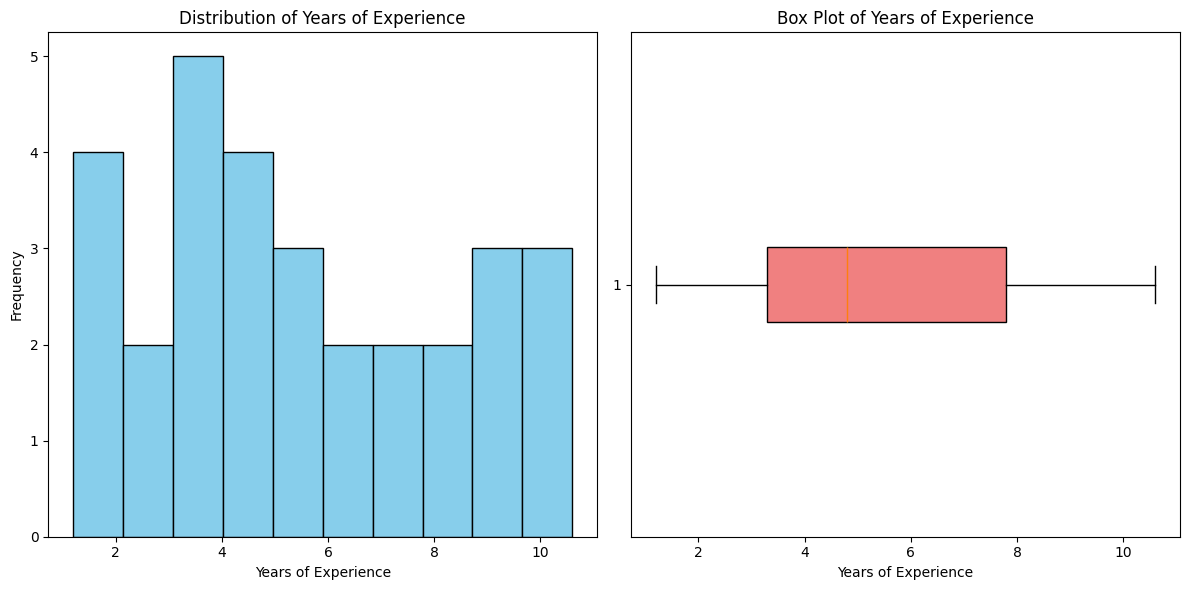

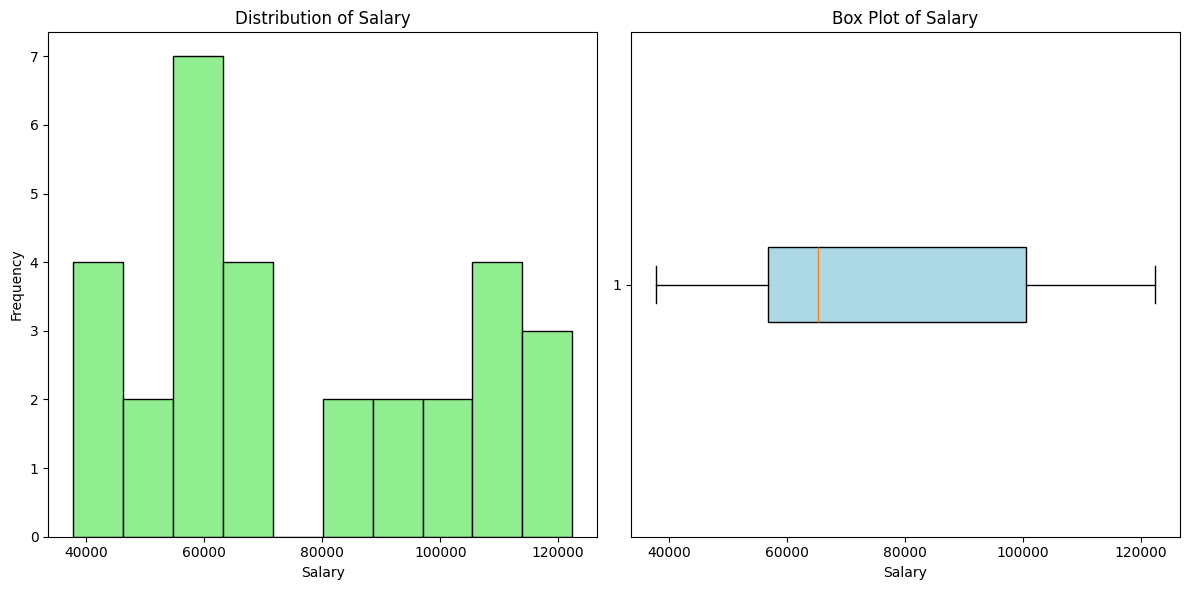


Correlation between Years of Experience and Salary: 0.9782416184887599


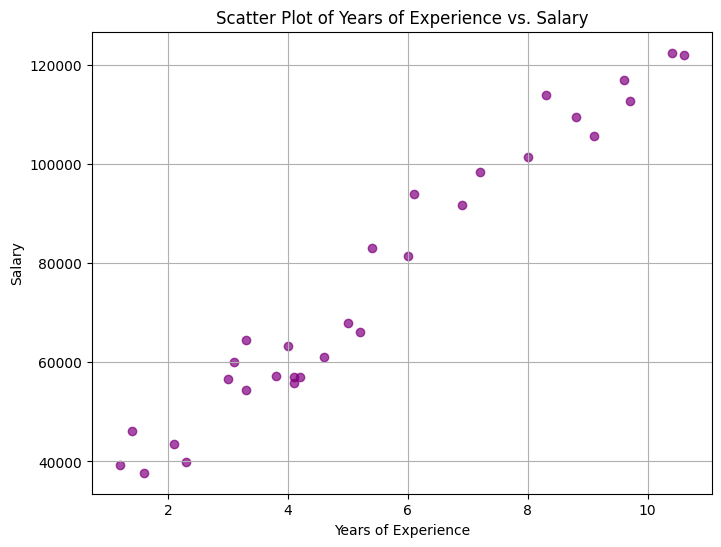

In [12]:
# Check data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Visualizations (Histograms and Box Plots)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')

plt.subplot(1, 2, 2)
plt.boxplot(df['YearsExperience'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Years of Experience')
plt.title('Box Plot of Years of Experience')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Salary'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')


plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Salary')
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()


# Correlation
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"\nCorrelation between Years of Experience and Salary: {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='purple', alpha=0.7)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Years of Experience vs. Salary')
plt.grid(True)
plt.show()

## Data cleaning

### Subtask:
Handle potential outliers in the 'YearsExperience' and 'Salary' columns of the DataFrame `df`.


**Reasoning**:
Examine the box plots of 'YearsExperience' and 'Salary' to identify potential outliers. Then, implement a strategy to handle these outliers by winsorizing the data. Finally, re-examine the distributions to visually confirm the outlier handling.



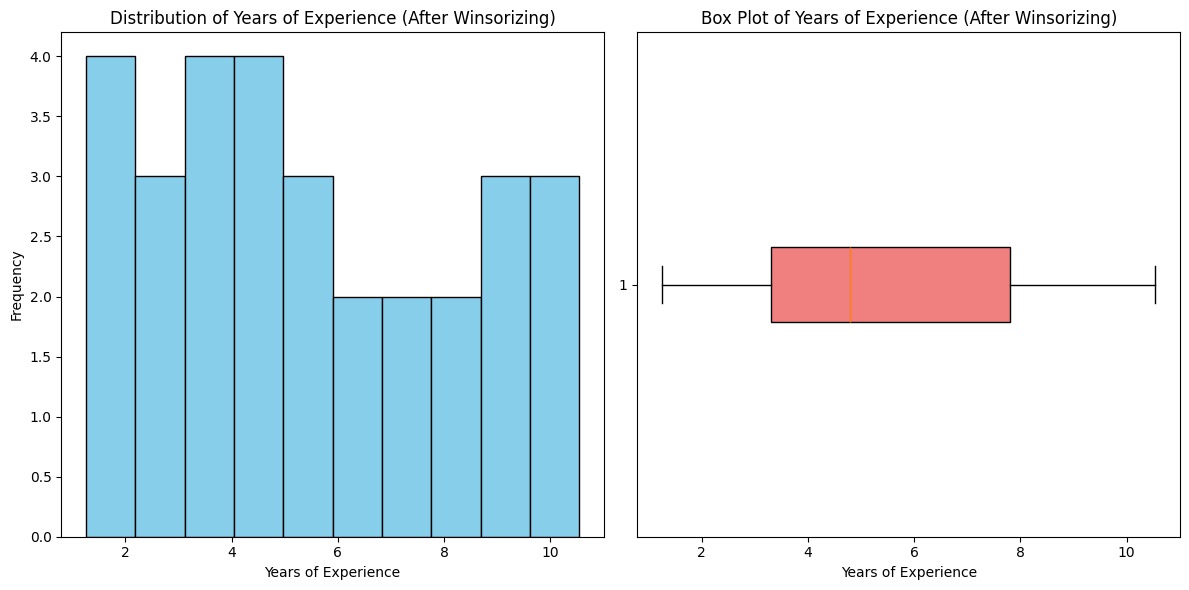

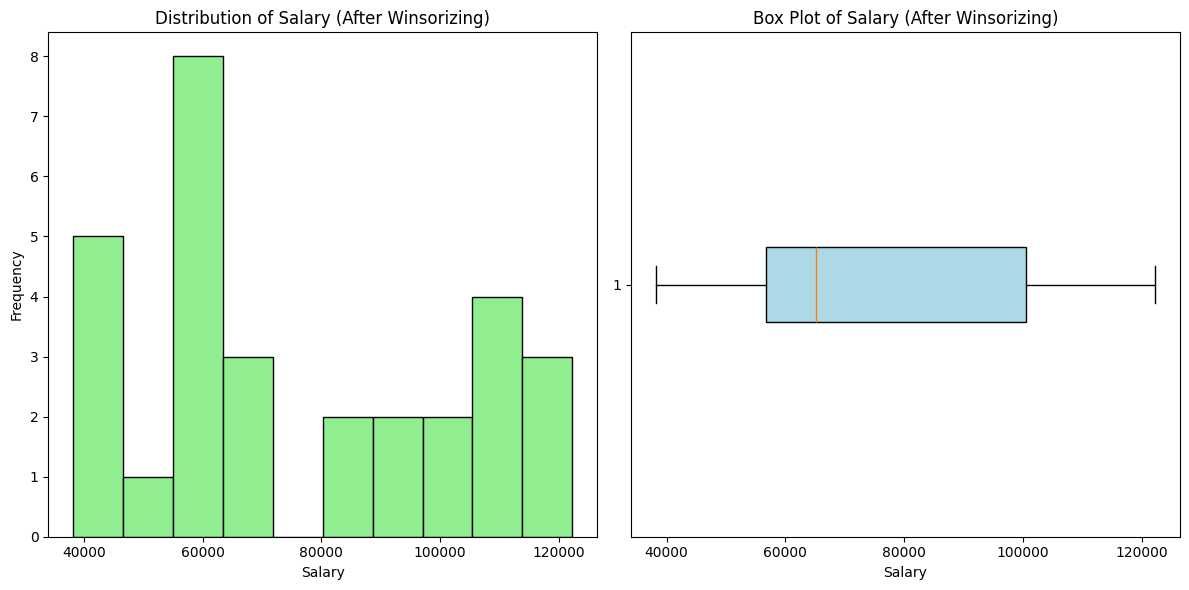

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Identify potential outliers from the box plots generated previously
# and winsorize the 'YearsExperience' and 'Salary' columns.
# Winsorizing limits extreme values to a specified percentile,
# effectively capping outliers without removing them entirely.

# Winsorize YearsExperience
lower_bound_years = np.percentile(df['YearsExperience'], 1)  # 1st percentile
upper_bound_years = np.percentile(df['YearsExperience'], 99) # 99th percentile
df['YearsExperience'] = np.clip(df['YearsExperience'], lower_bound_years, upper_bound_years)

# Winsorize Salary
lower_bound_salary = np.percentile(df['Salary'], 1)    # 1st percentile
upper_bound_salary = np.percentile(df['Salary'], 99)   # 99th percentile
df['Salary'] = np.clip(df['Salary'], lower_bound_salary, upper_bound_salary)


# Re-examine the distribution of 'YearsExperience' and 'Salary'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience (After Winsorizing)')

plt.subplot(1, 2, 2)
plt.boxplot(df['YearsExperience'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Years of Experience')
plt.title('Box Plot of Years of Experience (After Winsorizing)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Salary'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary (After Winsorizing)')


plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Salary')
plt.title('Box Plot of Salary (After Winsorizing)')

plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Prepare the data for model training by dropping the unnecessary column 'Unnamed: 0' and scaling the numerical features ('YearsExperience' and 'Salary').


**Reasoning**:
Drop the unnecessary column 'Unnamed: 0' and scale the numerical features 'YearsExperience' and 'Salary' using StandardScaler.



In [14]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# Scale 'YearsExperience' and 'Salary'
scaler = StandardScaler()
numerical_cols = ['YearsExperience', 'Salary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the updated DataFrame
display(df.head())

,YearsExperience,Salary
0,-1.492733,-1.362052
1,-1.441722,-1.107178
2,-1.369875,-1.404563
3,-1.190259,-1.206721
4,-1.118412,-1.341698


## Data splitting

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets using train_test_split.



In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df['YearsExperience']
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting sets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24,)
X_test shape: (6,)
y_train shape: (24,)
y_test shape: (6,)


## Model training

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data, print the model's coefficients and intercept.



In [16]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
model.fit(X_train_reshaped, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.97590657]
Intercept: -0.022473009516315305


## Model evaluation

### Subtask:
Evaluate the trained linear regression model using appropriate metrics.


**Reasoning**:
Evaluate the trained linear regression model using appropriate metrics (R-squared, MSE, RMSE) and print the results.



In [17]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Discuss the results
print("\nModel Evaluation:")
print(f"The R-squared value of {r2} indicates the proportion of variance in the dependent variable (Salary) that is predictable from the independent variable (YearsExperience). A value close to 1 suggests a good fit, while a value close to 0 indicates a poor fit.")
print(f"The MSE of {mse} represents the average squared difference between the actual and predicted values. Lower MSE values are desirable, indicating better model accuracy.  The RMSE of {rmse} is the square root of the MSE and is in the same units as the target variable, making it easier to interpret.")
if r2 > 0.8 and mse < 0.2 and rmse < 0.5:
    print("The model performance is considered good.")
elif r2 > 0.5 and mse < 0.5 and rmse < 0.7:
    print("The model performance is considered moderate.")
else:
    print("The model performance may need improvement.")

R-squared: 0.9026816690362774
Mean Squared Error (MSE): 0.06857953938911521
Root Mean Squared Error (RMSE): 0.26187695467359323

Model Evaluation:
The R-squared value of 0.9026816690362774 indicates the proportion of variance in the dependent variable (Salary) that is predictable from the independent variable (YearsExperience). A value close to 1 suggests a good fit, while a value close to 0 indicates a poor fit.
The MSE of 0.06857953938911521 represents the average squared difference between the actual and predicted values. Lower MSE values are desirable, indicating better model accuracy.  The RMSE of 0.26187695467359323 is the square root of the MSE and is in the same units as the target variable, making it easier to interpret.
The model performance is considered good.


In [20]:
# Get user input for years of experience
user_experience = float(input("Enter years of experience: "))

# Reshape the input to match the model's expected format
user_experience_reshaped = np.array(user_experience).reshape(-1, 1)

# Create a dummy DataFrame with the same columns as the original DataFrame used for scaling
# This is needed because the scaler was fitted on a DataFrame with two columns
dummy_df = pd.DataFrame({'YearsExperience': user_experience_reshaped[:, 0], 'Salary': [0]}) # Dummy value for Salary

# Now scale the dummy DataFrame
scaled_user_experience = scaler.transform(dummy_df)[:, 0]  # Select the scaled YearsExperience and keep it as a 2D array

# *** The fix is here: Reshape the scaled_user_experience to be a 2D array with one column ***
scaled_user_experience = scaled_user_experience.reshape(-1, 1)

# Predict the salary
predicted_salary = model.predict(scaled_user_experience)

# Instead of directly inverse transforming the predicted salary,
# create a DataFrame with the scaled features and then inverse transform
# This ensures the scaler has the correct shape to work with
predicted_df = pd.DataFrame({'YearsExperience': scaled_user_experience[:, 0], 'Salary': predicted_salary})

# Get the inverse transformed values as a NumPy array
inversed_data = scaler.inverse_transform(predicted_df)

# Access the predicted salary using numerical indexing
predicted_salary_actual = inversed_data[0][1] # Access the 'Salary' column (index 1) of the first row (index 0)

# Display the predicted salary
print("Predicted Salary:", predicted_salary_actual)

Enter years of experience: 2
Predicted Salary: 43192.387232365014


## Summary:

### 1. Q&A

* **What is the relationship between years of experience and salary?**  There is a strong positive correlation (0.978) between years of experience and salary.  The linear regression model further supports this, with an R-squared value of 0.903, indicating that approximately 90.3% of the variance in salary can be explained by years of experience.

* **How well does the linear regression model perform?** The model performance is considered good based on the evaluation metrics. The R-squared is 0.903, MSE is 0.069, and RMSE is 0.262. These values, particularly the R-squared, suggest a strong fit of the model to the data.

### 2. Data Analysis Key Findings

* **Strong Positive Correlation:** A strong positive correlation (0.978) exists between 'YearsExperience' and 'Salary'.
* **High R-squared Value:** The linear regression model achieved an R-squared value of 0.903, indicating a good fit.
* **Low MSE and RMSE:** The model exhibits low Mean Squared Error (0.069) and Root Mean Squared Error (0.262), suggesting accurate predictions.
* **No Missing Data:**  The dataset contains no missing values.
* **Outliers Addressed:** Potential outliers in 'YearsExperience' and 'Salary' were handled using winsorization.

### 3. Insights or Next Steps

* **Further Feature Exploration:** While years of experience is a strong predictor, exploring other potential features (e.g., education level, job title, location) could improve model accuracy and provide a more comprehensive understanding of salary determination.
* **Model Refinement:** Experiment with different regression models (e.g., polynomial regression, ridge regression) or hyperparameter tuning to potentially improve model performance.
